In [1]:

# Import necessary libraries
from fastai.vision import *
import fastai; fastai.__version__


'1.0.61'

In [2]:
# We can verify that we don’t have any corrupt images using the verify_images method.
import os
path = '../input/animals-new/animals_new'
for folder in ('colibri', 'cow', 'fishes', 'pigs', 'zebra'):
    print(folder)
    #verify_images(os.path.join(path, folder), delete=True, max_size=500)

colibri
cow
fishes
pigs
zebra


In [3]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=path, valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)
# Setting num_workers=0 prevents crushing!

In [4]:
data.classes

['colibri', 'cow', 'fishes', 'pigs', 'zebra']

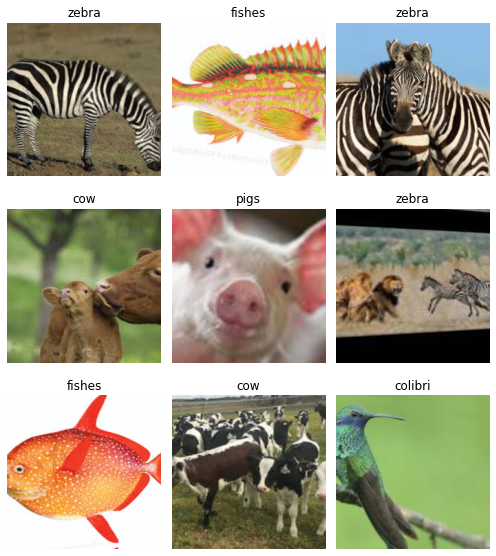

In [5]:
data.show_batch(rows=3, figsize=(7, 8))

In [6]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)
# The created model uses the resnet34 architecture, with weights pretrained on the imagenet dataset.
# By default, only the fully connected layers at the top are unfrozen (can be trained), 
# which if you are familiar with transfer learning makes perfect sense.

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [7]:
# defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.877558,0.375310,0.080000,00:05
1,1.599790,0.101748,0.020000,00:03
2,1.083141,0.085562,0.020000,00:03


In [8]:
learn.model_dir='/kaggle/working/'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


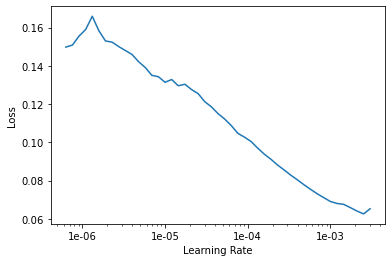

In [9]:
# Will take too long without GPU
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
#learn.model_dir='/kaggle/working/'
#learn.save('..animal-detection-stage-1')
learn.recorder.plot()

In [10]:
# Might take too long without GPU
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.109314,0.074172,0.020000,00:03
1,0.106298,0.040439,0.000000,00:03
2,0.087350,0.029948,0.000000,00:03
3,0.072138,0.029381,0.020000,00:03


In [11]:
learn.save('animal-detection-stage-1')

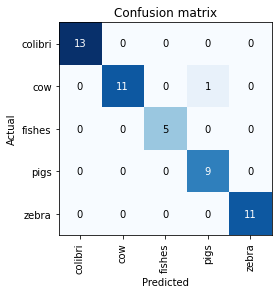

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

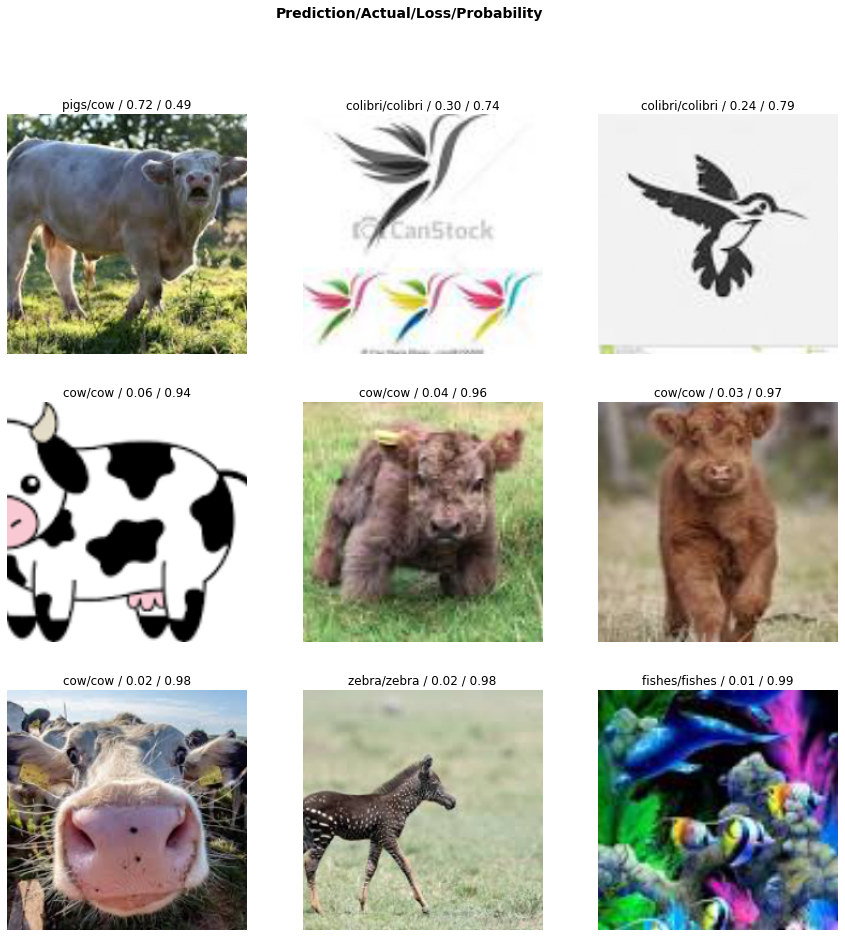

In [13]:
interp.plot_top_losses(9, figsize=(15,15))
# Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.

In [14]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________